<a href="https://colab.research.google.com/github/lilamil/amil1/blob/main/%D0%BB%D0%B0%D0%B1_4_(%D0%A8%D0%B0%D1%80%D0%B0%D1%84%D0%B5%D0%B5%D0%B2_%D0%90%D0%BC%D0%B8%D0%BB%D1%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ЛАБ 1 (символы и строки: группа string) (ВАРИАНТ 21)

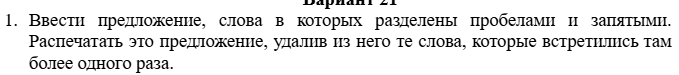

In [ ]:
S=input("S->")
x = S.replace(",", " ")
x = x.split()
word_counts = {word: x.count(word) for word in x}
unique_words = [word for word in x if word_counts[word] == 1]
result = ' '.join(unique_words)
print(result)

S->яблоко яблоко груша дыня томат арбуз яблоко груша дыня
томат арбуз


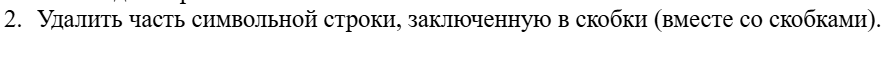

In [ ]:
s=input("S->")
start = s.find('(')
end = s.find(')', start)
s = s[:start] + s[end+1:]
print(s)

S->Hello (wor)ld
Hello ld


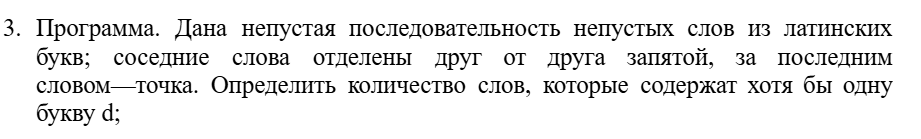

In [ ]:
s = input("S->")
x = s.split(",")
k = 0
for i in x:
  if i.find('d') != -1:
    k+=1
print(k)

S->driver,diver,climb,rabbit,crave,climb,note,table,book,dome,palace,house,derivative.
4


## ЛАБ 2 (текстовые файлы: группа Text) (ВАРИАНТ 21)

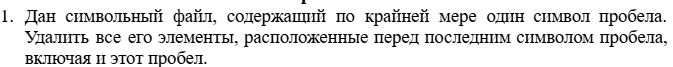

In [ ]:
# from faker import Faker
# import random
# fake = Faker()
# def generate_random_text():
#     return fake.text(max_nb_chars=random.randint(50, 200))
# def create_file(file_name, num_lines=10):
#     with open(file_name, 'w', encoding='utf-8') as file:
#         for _ in range(num_lines):
#             file.write(generate_random_text() + '\n')
# if __name__ == "__main__":
#     file_name = "generated_file.txt"
#     num_lines = 20
#     create_file(file_name, num_lines)
#     print(f"Файл '{file_name}' успешно создан с {num_lines} строками случайного текста.")

with open("/content/generated_file.txt","r") as f:
  content = f.read()
space_index = content.rfind(" ")
new_content = content[space_index+1:]
with open("/content/generated_file.txt","w") as f:
  f.write(new_content)

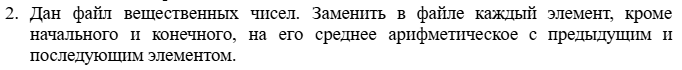

In [ ]:
# import random
# def generate_random_float(min_value=-100.0, max_value=100.0):
#     return round(random.uniform(min_value, max_value), 4)
# def create_float_file(file_name, num_lines=10):
#     with open(file_name, 'w', encoding='utf-8') as file:
#         for _ in range(num_lines):
#             file.write(f"{generate_random_float()}\n")
# file_name = "generated_floats.txt"
# num_lines = 20
# create_float_file(file_name, num_lines)
# print(f"Файл '{file_name}' успешно создан с {num_lines} строками вещественных чисел.")

with open("/content/generated_floats.txt","r") as f:
  content = f.read()
numbers = [float(line.strip()) for line in content.splitlines()]
if len(numbers) > 2:
    for i in range(1, len(numbers) - 1):
        numbers[i] = (numbers[i - 1] + numbers[i + 1]) / 2
with open("/content/new_floats.txt","w") as f:
  for number in numbers:
        f.write(f"{number}\n")

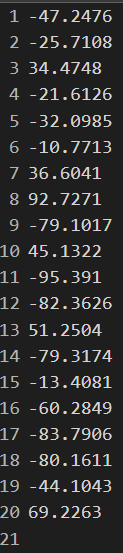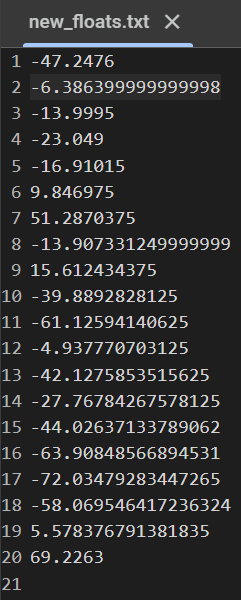

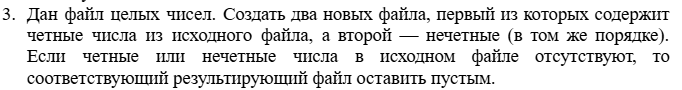

In [ ]:
# import random
# def generate_random_int(min_value=0, max_value=100):
#     return round(random.uniform(min_value, max_value))
# def create_int_file(file_name, num_lines=10):
#     with open(file_name, 'w', encoding='utf-8') as file:
#         for _ in range(num_lines):
#             file.write(f"{generate_random_int()}\n")
# file_name = "generated_integers.txt"
# num_lines = 20
# create_int_file(file_name, num_lines)
# print(f"Файл '{file_name}' успешно создан с {num_lines} строками вещественных чисел.")
with open("/content/generated_integers.txt","r") as f:
  content = f.read()
numbers = [int(line.strip()) for line in content.splitlines()]
with open("/content/even_ints.txt", "w") as even_file, \
     open("/content/odd_ints.txt", "w") as odd_file:
    for number in numbers:
        if number % 2 == 0:
            even_file.write(f"{number}\n")
        elif number % 2 == 1:
            odd_file.write(f"{number}\n")

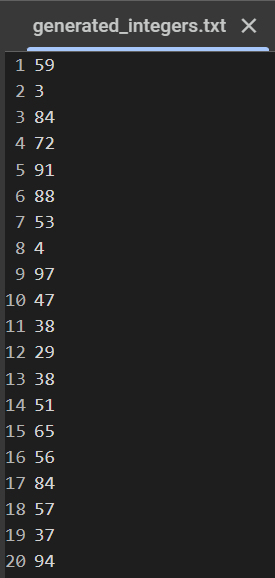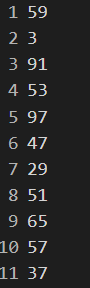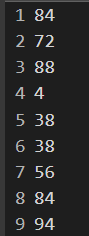

## Разработка программы тестирования


In [2]:
import random
import time
from datetime import datetime

class Question:
    def __init__(self, line):
        parts = line.strip().split('|')
        if len(parts) != 7:
            raise ValueError("Неверный формат вопроса. Ожидается 7 элементов через '|'")
        self.text = parts[0]
        self.options = parts[1:6]
        self.correct_answer_text = parts[6]
        self.correct_index = None

    def shuffle_options(self):
        option_flag_pairs = []
        for option in self.options:
            is_correct = (option.strip().lower() == self.correct_answer_text.strip().lower())
            option_flag_pairs.append((option, is_correct))
        random.shuffle(option_flag_pairs)
        self.options = []
        for idx, (option, flag) in enumerate(option_flag_pairs):
            self.options.append(option)
            if flag:
                self.correct_index = idx
        if self.correct_index is None:
            raise ValueError("Правильный ответ не найден среди вариантов.")

def load_questions(filename):
    questions = []
    try:
        with open(filename, encoding='utf-8') as f:
            for line in f:
                if line.strip():
                    try:
                        q = Question(line)
                        q.shuffle_options()
                        questions.append(q)
                    except ValueError as ve:
                        print(f"Ошибка в строке файла: {line.strip()} -> {ve}")
                        continue
    except FileNotFoundError:
        print(f"Файл {filename} не найден.")
        exit(1)
    except Exception as e:
        print(f"Ошибка при чтении файла: {e}")
        exit(1)
    return questions

def save_results(filename, start_time, end_time, total, correct):
    percentage = (correct / total * 100) if total > 0 else 0
    try:
        with open(filename, 'a', encoding='utf-8') as f:
            f.write(f"Время начала теста: {start_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Время окончания теста: {end_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Общее количество вопросов: {total}\n")
            f.write(f"Количество правильных ответов: {correct}\n")
            f.write(f"Процент правильных ответов: {percentage:.2f}%\n")
            f.write("-" * 40 + "\n")
    except Exception as e:
        print(f"Ошибка при сохранении результатов: {e}")

def get_user_answer():
    while True:
        answer = input("Введите номер ответа (от 1 до 5): ").strip()
        if answer.isdigit():
            num = int(answer)
            if 1 <= num <= 5:
                return num - 1
        print("Некорректный ввод. Попробуйте еще раз.")

def main():
    questions_file = "questions.txt"
    results_file = "results.txt"

    questions = load_questions(questions_file)
    if not questions:
        print("Нет вопросов для тестирования. Завершение программы.")
        exit(1)

    random.shuffle(questions)

    total_questions = len(questions)
    correct_answers = 0

    print("Начало теста. Всего вопросов:", total_questions)
    start_time = datetime.now()

    for idx, question in enumerate(questions, start=1):
        print(f"\nВопрос {idx}/{total_questions}: {question.text}")
        for i, option in enumerate(question.options, start=1):
            print(f"{i}. {option}")
        user_answer = get_user_answer()
        if user_answer == question.correct_index:
            print("Правильно!")
            correct_answers += 1
        else:
            print("Неправильно.")

    end_time = datetime.now()
    percentage = (correct_answers / total_questions * 100) if total_questions > 0 else 0

    print("\nТестирование завершено!")
    print("Общее количество вопросов:", total_questions)
    print("Количество правильных ответов:", correct_answers)
    print(f"Процент правильных ответов: {percentage:.2f}%")

    save_results(results_file, start_time, end_time, total_questions, correct_answers)
    print(f"Результаты тестирования сохранены в файл {results_file}.")

main()

Начало теста. Всего вопросов: 20

Вопрос 1/20: Какое ключевое слово в SQL используется для фильтрации уникальных значений?
1. GROUP BY
2. DISTINCT
3. ORDER BY
4. WHERE
5. SELECT
Введите номер ответа (от 1 до 5): 2
Правильно!

Вопрос 2/20: Какой язык программирования был создан первым?
1. Ruby
2. Python
3. Fortran
4. Java
5. C
Введите номер ответа (от 1 до 5): 3
Правильно!

Вопрос 3/20: Какая база данных является нереляционной (NoSQL)?
1. MySQL
2. MongoDB
3. SQLite
4. Oracle
5. PostgreSQL
Введите номер ответа (от 1 до 5): 2
Правильно!

Вопрос 4/20: Какой протокол используется для отправки электронной почты?
1. SSH
2. SMTP
3. HTTP
4. FTP
5. IMAP
Введите номер ответа (от 1 до 5): 5
Неправильно.

Вопрос 5/20: Какая из перечисленных технологий является JavaScript-библиотекой для работы с пользовательским интерфейсом?
1. Laravel
2. Flask
3. React
4. Django
5. Node.js
Введите номер ответа (от 1 до 5): 3
Правильно!

Вопрос 6/20: Какое расширение файла обычно используется для скриптов на языке 